In [1]:
import pandas as pd
import pyreadstat as st
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\DiTella\MEC\Materias\2025\2025 2T\[MT08-MT13] Microeconometría II\Clases prácticas\PS\PS2-20251111\cattaneo2.dta"

df, meta = st.read_dta(path)
df.head(1)

,bweight,mmarried,mhisp,fhisp,foreign,alcohol,deadkids,mage,medu,fage,...,order,msmoke,mbsmoke,mrace,frace,prenatal,birthmonth,lbweight,fbaby,prenatal1
0,3459,1,0,0,0,0,0,24,14,28,...,2,0,0,1,1,1,12,0,0.0,1.0


In [3]:
means_by_group = df.groupby('mbsmoke')[[
    'mmarried', 'mhisp', 'foreign', 'alcohol', 'deadkids', 'mage', 
    'medu', 'nprenatal', 'monthslb', 'order', 'mrace', 'prenatal', 
    'fbaby', 'prenatal1'
]].mean().round(3)

means_by_group

,mmarried,mhisp,foreign,alcohol,deadkids,mage,medu,nprenatal,monthslb,order,mrace,prenatal,fbaby,prenatal1
mbsmoke,,,,,,,,,,,,,,
0,0.751,0.036,0.060,0.019,0.246,26.810,12.930,10.963,21.898,1.859,0.848,1.178,0.453,0.827
1,0.473,0.024,0.025,0.091,0.318,25.167,11.639,9.862,28.220,2.036,0.809,1.308,0.372,0.690


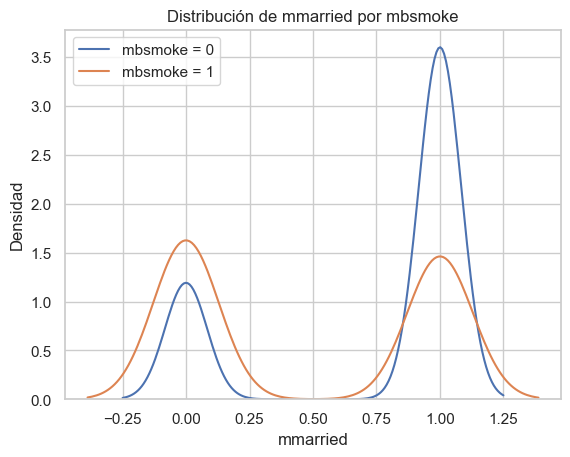

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo
sns.set(style="whitegrid")

# Graficar las densidades kernel
sns.kdeplot(data=df[df["mbsmoke"] == 0], x="mmarried", label="mbsmoke = 0", fill=False)
sns.kdeplot(data=df[df["mbsmoke"] == 1], x="mmarried", label="mbsmoke = 1", fill=False)

# Etiquetas y título
plt.xlabel("mmarried")
plt.ylabel("Densidad")
plt.title("Distribución de mmarried por mbsmoke")
plt.legend()
plt.show()


In [5]:
# Prueba de medias.

from scipy import stats

# Lista de variables
variables = [
    "mmarried", "mhisp", "foreign", "alcohol", "deadkids", "mage", "medu",
    "nprenatal", "monthslb", "order", "mrace", "prenatal", "fbaby", "prenatal1"
]

# Loop sobre cada variable
for var in variables:
    print(f"\nTest de diferencia de medias para {var}")
    
    # Subgrupos
    g0 = df.loc[df["mbsmoke"] == 0, var].dropna()
    g1 = df.loc[df["mbsmoke"] == 1, var].dropna()
    
    # t-test con varianzas desiguales (Welch)
    t_stat, p_val = stats.ttest_ind(g0, g1, equal_var=False)
    
    # Medias de cada grupo
    mean0, mean1 = g0.mean(), g1.mean()
    
    print(f" Media (mbsmoke=0): {mean0:.3f}")
    print(f" Media (mbsmoke=1): {mean1:.3f}")
    print(f" t = {t_stat:.3f},  p = {p_val:.4f}")


Test de diferencia de medias para mmarried
 Media (mbsmoke=0): 0.751
 Media (mbsmoke=1): 0.473
 t = 15.118,  p = 0.0000

Test de diferencia de medias para mhisp
 Media (mbsmoke=0): 0.036
 Media (mbsmoke=1): 0.024
 t = 1.973,  p = 0.0487

Test de diferencia de medias para foreign
 Media (mbsmoke=0): 0.060
 Media (mbsmoke=1): 0.025
 t = 5.201,  p = 0.0000

Test de diferencia de medias para alcohol
 Media (mbsmoke=0): 0.019
 Media (mbsmoke=1): 0.091
 t = -7.223,  p = 0.0000

Test de diferencia de medias para deadkids
 Media (mbsmoke=0): 0.246
 Media (mbsmoke=1): 0.318
 t = -4.176,  p = 0.0000

Test de diferencia de medias para mage
 Media (mbsmoke=0): 26.810
 Media (mbsmoke=1): 25.167
 t = 8.122,  p = 0.0000

Test de diferencia de medias para medu
 Media (mbsmoke=0): 12.930
 Media (mbsmoke=1): 11.639
 t = 15.279,  p = 0.0000

Test de diferencia de medias para nprenatal
 Media (mbsmoke=0): 10.963
 Media (mbsmoke=1): 9.862
 t = 7.139,  p = 0.0000

Test de diferencia de medias para monthslb